In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))

Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]


In [ ]:
small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


# [Problem 1] Number of wheat on a 2 x 2 square chess board

In [ ]:
small_board_ndarray.reshape((2,2))

array([[1, 2],
       [4, 8]])

# [Problem 2] Expansion to n × m mass

In [ ]:
def ndarray_creation(n,m):
    arr = np.array([2**i for i in range(n*m)]).astype(np.uint64)
    arr = arr.reshape((n,m))
    return arr

print(ndarray_creation(4,8))

[[         1          2          4          8         16         32
          64        128]
 [       256        512       1024       2048       4096       8192
       16384      32768]
 [     65536     131072     262144     524288    1048576    2097152
     4194304    8388608]
 [  16777216   33554432   67108864  134217728  268435456  536870912
  1073741824 2147483648]]


# [Problem 3] Total number of wheat

Total number of wheat: 18446744073709551615


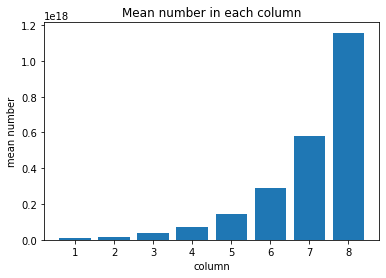

In [ ]:
ndarray = ndarray_creation(8,8)
print("Total number of wheat: {}".format(ndarray.sum()))
plt.xlabel("column")
plt.ylabel("mean number")
plt.title("Mean number in each column")
plt.bar(np.arange(1,9), np.mean(ndarray, axis=0).flatten())
plt.show()

# [Problem 4] Heat map of the number of wheat

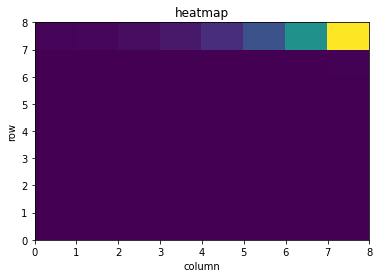

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(ndarray)
plt.show()

# [Problem 5] How many times is the second half as long as the first half?

In [ ]:
first_half = ndarray[:4].sum()
second_half = ndarray[4:].sum()
print("The second half is {:.2f} greater than the first half".format(second_half/first_half))

The second half is 4294967296.00 greater than the first half


In [ ]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


In [ ]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


In [ ]:
a = np.array([0,1,2])
# When not using broadcast
b = np.array([5,5,5])
print(a + b)  # Out: [5,6,7]

# When using broadcast
print(a + 5)  # Out: [5,6,7] * 5 is automatically converted to the matrix of (1,3) ([5,5,5])

[5 6 7]
[5 6 7]


In [ ]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("Number of wheat in the last trout：{}".format(board_ndarray[-1]))

Number of wheat in the last trout：-9223372036854775808


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


In [ ]:
n_squares = 64
board_ndarray = np.array([1]).astype(np.uint64)
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("Number of wheat in the last trout：{}".format(board_ndarray[-1]))

Number of wheat in the last trout：9.223372036854776e+18


# [Problem 6] Expansion to n × m mass by another calculation method

In [ ]:
def ndarray_creation_2(n,m):
    board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(m*n - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    return board_ndarray.reshape((n,m))

def ndarray_creation_3(n,m):
    indices_of_squares = np.arange(n*m).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares
    return board_ndarray.reshape((n,m))

print(ndarray_creation_2(8,8).sum())
print(ndarray_creation_3(8,8).sum())

# [Problem 7] Comparing calculation times

In [133]:
%%timeit
ndarray_creation(8,8)

The slowest run took 23.78 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 29 µs per loop


In [134]:
%%timeit
ndarray_creation_2(8,8)

1000 loops, best of 5: 437 µs per loop


In [135]:
%%timeit
ndarray_creation_3(8,8)

The slowest run took 23.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.89 µs per loop
